Data Preprocessing - Load Data and Handle Missing Values

In [1]:
import pandas as pd
df = pd.read_csv('customer_behavior_analytcis.csv').dropna()
print("Missing values removed. Rows remaining:", len(df))

Missing values removed. Rows remaining: 979


Feature Scaling

In [2]:
from sklearn.preprocessing import StandardScaler
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train K-means Clustering

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

Cluster Interpretation - Cluster Centers (In Original Scale)

In [4]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_stats = pd.DataFrame(cluster_centers, columns=features)
cluster_stats['segment'] = ['Bargain Hunters', 'High Spenders', 'Window Shoppers']
print(cluster_stats)

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        10.175385      147.327169         40.284369      19.895385   
1         4.862805       49.029848         90.114726      49.716463   
2        19.711656       30.399509         17.453988      14.944785   

   discount_counts          segment  
0         1.972308  Bargain Hunters  
1         1.030488    High Spenders  
2         9.938650  Window Shoppers  


Visualization 

PCA Scatter Plot

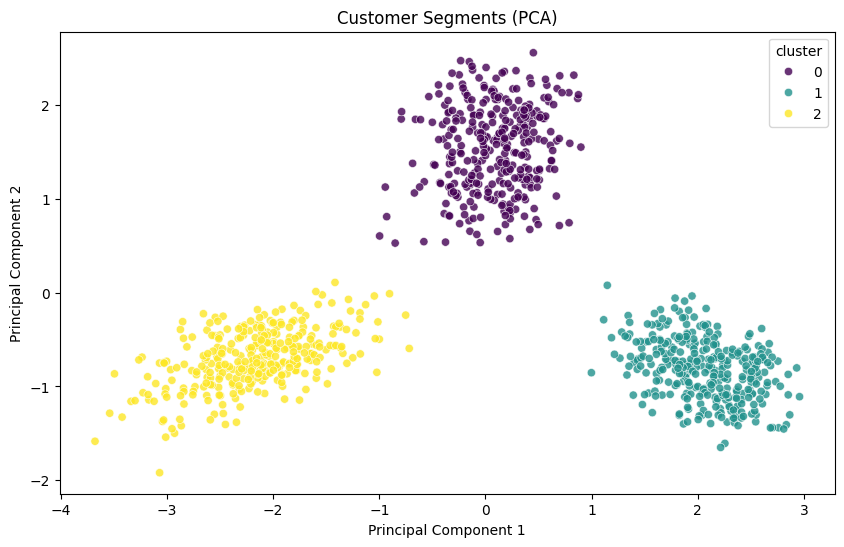

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis', alpha=0.8)
plt.title('Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Parallel Coordinates Plot

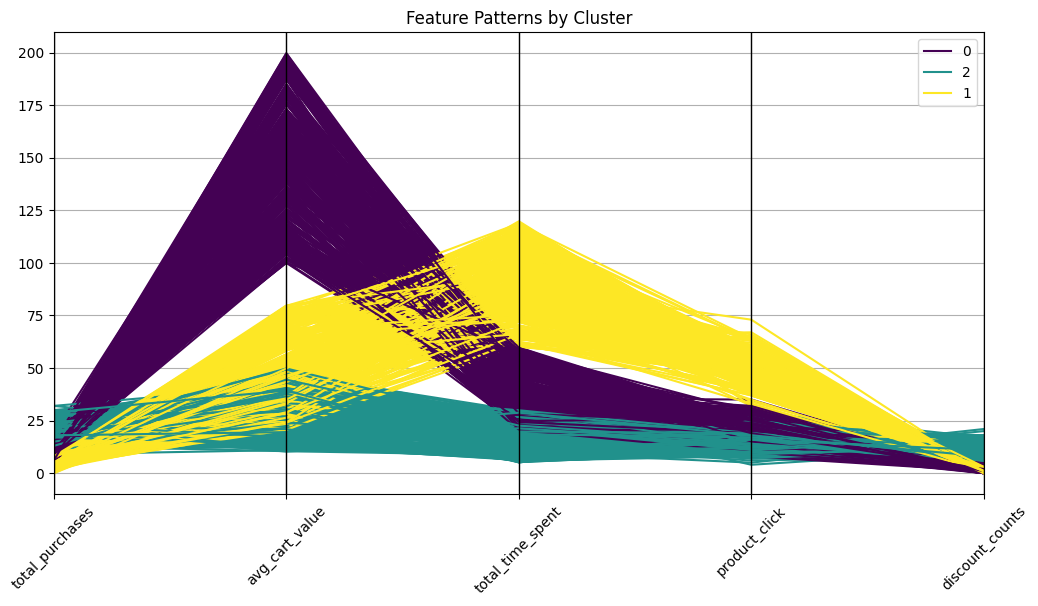

In [6]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(
    df.assign(cluster=df['cluster'].astype(str))[features + ['cluster']],
    'cluster',
    colormap='viridis'
)
plt.title('Feature Patterns by Cluster')
plt.xticks(rotation=45)
plt.show()

Radar Chart (Cluster Profiles)

this show in the browser

In [21]:
import plotly.express as px

# Normalize cluster centers for radar chart
radar_df = cluster_stats.copy()
radar_df[features] = radar_df[features].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

fig = px.line_polar(
    radar_df,
    r=radar_df.iloc[0, :-1].values,
    theta=features,
    line_close=True,
    title='Cluster Profiles'
)
fig.update_traces(fill='toself')
fig.show()

Model Validation  

In [22]:
from sklearn.metrics import silhouette_score
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.2f}")

Silhouette Score: 0.63
